# 读取 label json

In [1]:
import json


json_file = '/Users/panda/Documents/Factory/JupyterNotebook/deepglint/rcooper/dataset/label/136-137-138-139/136/seq-0/1693908913.283240.json'

label_list = json.load(open(json_file, 'r'))
print(type(label_list))

<class 'list'>


# 查看 label 列表内容

In [2]:
for label in label_list:
    print(label)

{'type': 'truck', 'occluded_state': 0, 'truncated_state': 0, 'crowding': 0, 'ignore': 0, 'track_id': 0, '3d_location': {'x': 18.70576045590078, 'y': 4.49124463079955, 'z': -3.523608893161712}, '3d_dimensions': {'w': 2.839287132146564, 'h': 3.784140996477944, 'l': 9.236302997902763}, 'rotation': 3.0089647362459573}
{'type': 'truck', 'occluded_state': 0, 'truncated_state': 0, 'crowding': 0, 'ignore': 0, 'track_id': 1, '3d_location': {'x': -38.86181114926398, 'y': -2.7594854833246694, 'z': -5.270662063246843}, '3d_dimensions': {'w': 2.843389063808926, 'h': 3.9286631286489957, 'l': 8.849939559353086}, 'rotation': -0.5594908043354077}
{'type': 'car', 'occluded_state': 0, 'truncated_state': 0, 'crowding': 0, 'ignore': 0, 'track_id': 2, '3d_location': {'x': 49.47268259699531, 'y': -24.40295883139567, 'z': -2.6125568117921896}, '3d_dimensions': {'w': 2.1100098769444875, 'h': 1.516869839647467, 'l': 4.499996119216836}, 'rotation': 0.46367101937623867}
{'type': 'motorcycle', 'occluded_state': 0,

In [3]:
for label in label_list:
    print(label['3d_location'])

{'x': 18.70576045590078, 'y': 4.49124463079955, 'z': -3.523608893161712}
{'x': -38.86181114926398, 'y': -2.7594854833246694, 'z': -5.270662063246843}
{'x': 49.47268259699531, 'y': -24.40295883139567, 'z': -2.6125568117921896}
{'x': 39.351317782793764, 'y': -10.566438116259443, 'z': -3.2526901164303013}
{'x': 12.47388068564303, 'y': -30.393295527786712, 'z': -4.134530520579364}
{'x': 77.44520934580086, 'y': -49.75322366263344, 'z': -1.0378705439968448}
{'x': 81.16347923978987, 'y': -47.45586953777033, 'z': -0.9768626096326014}
{'x': 114.3362591476227, 'y': -63.39460709120962, 'z': 0.06327229584586937}
{'x': 107.1024418670831, 'y': -59.127046347661896, 'z': 0.10217344710061917}
{'x': 93.67558282545014, 'y': -55.45814829506872, 'z': -0.39442751184272695}
{'x': 90.96657848621717, 'y': -57.47074146874866, 'z': -0.38270326350543704}
{'x': 50.247636007731394, 'y': 7.990411698231097, 'z': -1.4524458382498135}
{'x': 59.44313979368257, 'y': 17.509742207794165, 'z': -2.6870634032666496}
{'x': 55.

# 将目标 3d 位置在3D坐标系中可视化

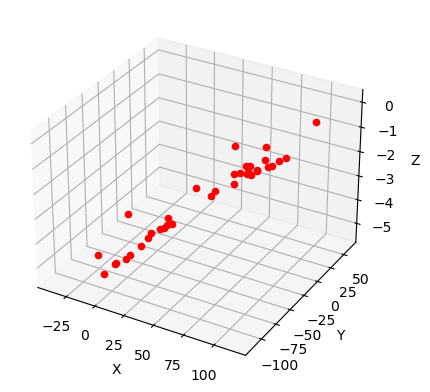

In [4]:
import matplotlib.pyplot as plt

# ====== show 3D box bottom in a 3D coordinate system ======
# create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for label in label_list:
    pos3d = label['3d_location']
    # print(pos3d)
    # Plot the points
    x = pos3d['x']
    y = pos3d['y']
    z = pos3d['z']
    ax.scatter(x, y, z, color='red', marker='o')

# 读取坐标转化矩阵

In [5]:
import numpy as np

In [6]:
# lidar to camera
json_file = '/Users/panda/Documents/Factory/JupyterNotebook/deepglint/rcooper/dataset/calib/lidar2cam/136.json'
lid2cam_calib = json.load(open(json_file, 'r'))
lid2cam_calib = lid2cam_calib['cam_0']
lid2cam_extri = lid2cam_calib['extrinsic']
lid2cam_intri = lid2cam_calib['intrinsic']
lid2cam_extri = np.array(lid2cam_extri)
lid2cam_intri = np.array(lid2cam_intri)
# camera to lidar
cam2lid_extri = np.linalg.inv(lid2cam_extri)
print(f'lid2cam_extri:\n{lid2cam_extri}\n')
print(f'cam2lid_extri:\n{cam2lid_extri}\n')

# lidar to world
json_file = '/Users/panda/Documents/Factory/JupyterNotebook/deepglint/rcooper/dataset/calib/lidar2world/136.json'
lid2world_calib = json.load(open(json_file, 'r'))
lid2world_calib_R = lid2world_calib['rotation']
lid2world_calib_R = np.array(lid2world_calib_R)
lid2world_calib_T = lid2world_calib['translation']
lid2world_calib_T = np.array(lid2world_calib_T)
lid2world_extri = np.hstack((lid2world_calib_R, lid2world_calib_T.reshape(3,1)))
row = np.array([0., 0., 0., 1.])
lid2world_extri = np.vstack((lid2world_extri, row))
# world to lidar
world2lid_extri = np.linalg.inv(lid2world_extri)
print(f'lid2world_extri:\n{lid2world_extri}\n')
print(f'world2lid_extri:\n{world2lid_extri}\n')

lid2cam_extri:
[[-0.56319702 -0.82621199  0.0135458   0.4375    ]
 [-0.174621    0.102978   -0.97923601  1.125     ]
 [ 0.807661   -0.553868   -0.202271    1.25      ]
 [ 0.          0.          0.          1.        ]]

cam2lid_extri:
[[-0.56319685 -0.17462128  0.80766147 -0.56672928]
 [-0.82621135  0.10297799 -0.55386809  0.93795233]
 [ 0.01354567 -0.97923584 -0.20227083  1.34855263]
 [ 0.          0.          0.          1.        ]]

lid2world_extri:
[[ 7.73612510e-01 -6.33018700e-01  2.84780000e-02 -3.83076913e+03]
 [ 6.32847340e-01  7.74114900e-01  1.58235000e-02 -1.23503839e+04]
 [-3.20618100e-02  5.78098000e-03  9.99469180e-01  2.70591661e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

world2lid_extri:
[[ 7.73612499e-01  6.32847304e-01 -3.20618151e-02  1.07803056e+04]
 [-6.33018734e-01  7.74114908e-01  5.78096892e-03  7.13551123e+03]
 [ 2.84780023e-02  1.58234866e-02  9.99469159e-01  2.77473985e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.

In [7]:
trans_matrix = np.array([[ 1.0000e+00, -5.5511e-17, -5.2042e-18,  4.5475e-13],
        [-5.5511e-17,  1.0000e+00,  0.0000e+00,  4.5475e-13],
        [ 1.7347e-18,  0.0000e+00,  1.0000e+00,  4.2633e-14],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

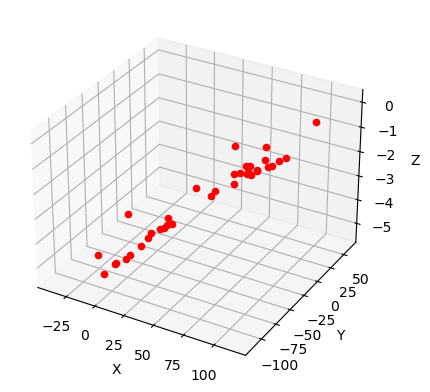

In [10]:
# ====== show 3D box bottom in a 3D coordinate system ======
# create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for label in label_list:
    pos3d = [label['3d_location']['x'], label['3d_location']['y'], label['3d_location']['z'], 1.]
    pos3d = np.array(pos3d)
    pos3d_lid = trans_matrix @ pos3d
    # print(pos3d)
    # Plot the points
    x, y, z = pos3d_lid[:3]
    ax.scatter(x, y, z, color='red', marker='o')

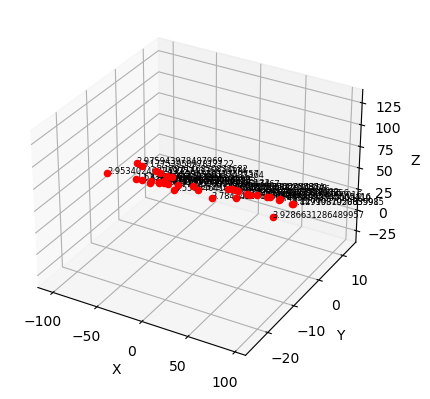

In [9]:
# ====== show 3D box bottom in a 3D coordinate system ======
# create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for label in label_list:
    type_obj = label['type']
    h = label['3d_dimensions']['h']
    pos3d = [label['3d_location']['x'], label['3d_location']['y'], label['3d_location']['z'], 1.]
    pos3d = np.array(pos3d)
    pos3d_cam = lid2cam_extri @ pos3d
    # print(pos3d)
    # Plot the points
    x, y, z = pos3d_cam[:3]
    ax.scatter(x, y, z, color='red', marker='o')
    ax.text(x, y, z, h, color='black', fontsize=6)

# 在场景图中可视化标签

In [48]:
import numpy as np

# arr = np.array([[1,2,3]])
arr = np.empty((1,3))
standby = np.array([[85,4,3],[2,2,6],[9,2,76],[15,21,3],[7,4,3]])

print(arr)
print(arr[0])


for i in standby:
    # arr = np.append(arr, i.reshape(1,3), axis=0)
    arr = np.vstack((arr, i))
print(arr[1:])

[[0.99286444 0.94452255 1.03151243]]
[0.99286444 0.94452255 1.03151243]
[[85.  4.  3.]
 [ 2.  2.  6.]
 [ 9.  2. 76.]
 [15. 21.  3.]
 [ 7.  4.  3.]]


In [37]:
arr = np.array([[1,2,3]])
standby = np.array([[5],[3],[8],[59],[0]])

for i in standby:
    # i.reshape(1,-1)
    print(i.shape)
    arr = np.append(arr, i)
print(arr)

(1,)
(1,)
(1,)
(1,)
(1,)
[ 1  2  3  5  3  8 59  0]


In [62]:
Rotation_arr = np.empty((0,3,3))

standby = np.array([[0.578336, -0.81382336, -0.05673638],
                    [-0.81507282, -0.57935545, 0.00188667],
                    [-0.03440594, 0.04515315, -0.99838741]])

Rotation_arr = np.vstack((Rotation_arr, standby))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [69]:
import numpy as np

# Initialize a 3D array with shape (1, 3, 3)
Rotation_arr = np.empty((0, 3, 3))

print(Rotation_arr)

# Define the standby array with shape (3, 3)
standby = np.array([[0.578336, -0.81382336, -0.05673638],
                    [-0.81507282, -0.57935545, 0.00188667],
                    [-0.03440594, 0.04515315, -0.99838741]])

# Reshape standby to (1, 3, 3) and stack
Rotation_arr = np.vstack((Rotation_arr, standby[np.newaxis, :, :]))

Rotation_arr = np.vstack((Rotation_arr, standby[np.newaxis, :, :]))

print(Rotation_arr)

[]
[[[ 0.578336   -0.81382336 -0.05673638]
  [-0.81507282 -0.57935545  0.00188667]
  [-0.03440594  0.04515315 -0.99838741]]

 [[ 0.578336   -0.81382336 -0.05673638]
  [-0.81507282 -0.57935545  0.00188667]
  [-0.03440594  0.04515315 -0.99838741]]]
